In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error

In [2]:
df = pd.read_csv('dataset.csv')

df.head()

,X1,X2,Y
0,2.781084,2.550537,0
1,1.465489,2.362125,0
2,3.396562,4.400294,0
3,1.388070,1.850220,0
4,3.064072,3.005306,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      10 non-null     float64
 1   X2      10 non-null     float64
 2   Y       10 non-null     int64  
dtypes: float64(2), int64(1)
memory usage: 368.0 bytes


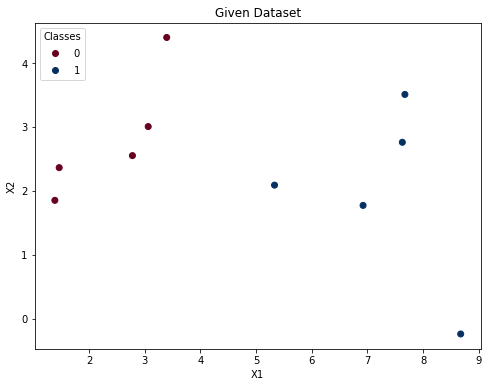

In [4]:
plt.figure(figsize=(8, 6))
sc = plt.scatter(df['X1'], df['X2'], c=df['Y'], cmap=plt.cm.RdBu)
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(*sc.legend_elements(), title='Classes', loc='upper left')
plt.title('Given Dataset')
plt.show()

In [5]:
X = df['X1'].values
Y = df['Y'].values

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y)

In [7]:
b0, b1 = 0.0, 0.0

alpha = 0.3
epochs = 20
n = len(X_train)

ERRORS = []
LOSS = []
ACC = []

for i in range(epochs):
    correct = 0
    for x, y in zip(X_train, Y_train):
        z = b0 + b1 * x
        pred = 1 / (1 + np.exp(-z))
        loss =  - (y - np.log(pred) + (1 - y) * np.log(1 - pred))

        ERRORS.append(y - pred)
        LOSS.append(loss)
        
        delta_b0 = alpha * (y - pred) * pred * (1 - pred)
        delta_b1 = alpha * (y - pred) * pred * (1 - pred) * x
        
        b0 = b0 + delta_b0
        b1 = b1 + delta_b1
        
        y_pred = 1 if pred >= 0.5 else 0
        correct = correct + 1 if y_pred == y else correct
        
        #print('B0:%.2f B1:%.2f' % (b0, b1))
        #print(f'X:%d Y:%d Pred:%.2f' % (x, y, pred))
    
    acc = correct / n
    ACC.append(acc)

In [8]:
print('--- Coefficients ---')
print('B0: %.2f\nB1: %.2f' % (b0, b1))

--- Coefficients ---
B0: -1.77
B1: 0.47


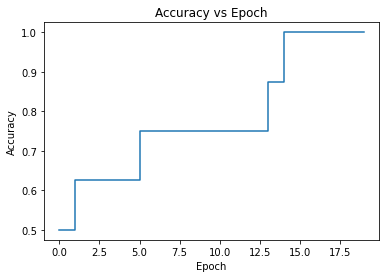

In [9]:
plt.step(range(epochs), ACC)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epoch')
plt.show()

In [10]:
Z = b0 + b1 * X_test
Y_pred = 1 / (1 + np.exp(-Z))

In [11]:
print(f'Mean Squared Error: {mean_squared_error(Y_test, Y_pred)}')

Mean Squared Error: 0.11486069715323878


In [12]:
Y_pred = np.array(Y_pred >= 0.5, np.uint8)

In [13]:
print('Confusion Matrix: ')
print(confusion_matrix(Y_test, Y_pred))

Confusion Matrix: 
[[1 0]
 [0 1]]


In [14]:
print("\nClassification Report:")
print(classification_report(Y_test, Y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



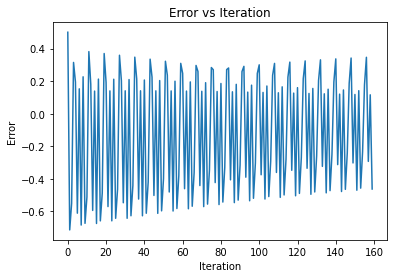

In [15]:
plt.plot(ERRORS)
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('Error vs Iteration')
plt.show()

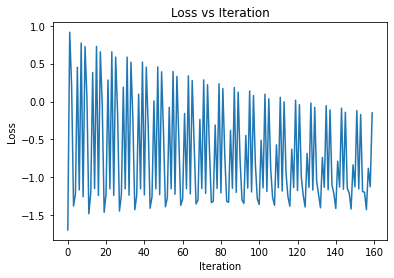

In [16]:
plt.plot(LOSS)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss vs Iteration')
plt.show()

In [17]:
def get_errors(b0, b1):
    global X, Y
    Z = b0 + b1 * X
    Y_pred = 1 / (1 + np.exp(-Z))
    error = np.sum((Y_pred - Y) ** 2) / len(Y)
    return error  

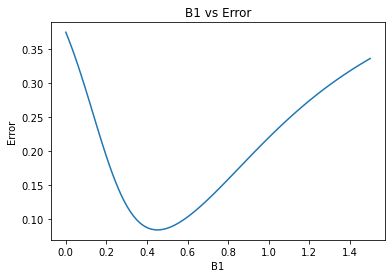

In [18]:
B1 = np.linspace(0, 1.5, 100)
ERROR = []

for b1_ in B1:
    ERROR.append(get_errors(b0, b1_))

plt.plot(B1, ERROR)
plt.xlabel('B1')
plt.ylabel('Error')
plt.title('B1 vs Error')
plt.show()

In [19]:
model = LogisticRegression()
model.fit(X_train.reshape(-1, 1), Y_train)

LogisticRegression()

In [20]:
Y_pred = model.predict(X_test.reshape(-1, 1))

In [21]:
print('Confusion Matrix: ')
print(confusion_matrix(Y_test, Y_pred))

Confusion Matrix: 
[[1 0]
 [0 1]]


In [22]:
print("\nClassification Report:")
print(classification_report(Y_test, Y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

